In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
df=pd.read_csv("BlackFriday.csv")

In [5]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [15]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [25]:
 
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [7]:
del df["Product_Category_2"]
del df["Product_Category_3"]

## Analyzing columns 

In [32]:
df["Product_ID"].nunique()

3631

In [34]:
df["User_ID"].nunique()

5891

In [36]:
df["Gender"].unique()

array(['F', 'M'], dtype=object)

In [38]:
df["Age"].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [44]:
df["Occupation"].nunique()

21

In [46]:
df["City_Category"].unique()

array(['A', 'C', 'B'], dtype=object)

In [50]:
df["Stay_In_Current_City_Years"].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [52]:
# average purchase 
df["Purchase"].sum()/len(df["Purchase"])

9263.968712959126

In [54]:
for column in df.columns:
    print(f"{column} :- {df[column].nunique()}")
    

User_ID :- 5891
Product_ID :- 3631
Gender :- 2
Age :- 7
Occupation :- 21
City_Category :- 3
Stay_In_Current_City_Years :- 5
Marital_Status :- 2
Product_Category_1 :- 20
Purchase :- 18105


## Analysing based on gender 

### Ratio of female :male

In [58]:
len(df[df["Gender"]=="M"]),len(df[df["Gender"]=="F"])

(414259, 135809)

In [9]:
data=pd.DataFrame({"Ratio":[len(df[df["Gender"]=="M"]),len(df[df["Gender"]=="F"])]},index=["Male","Female"])

<Axes: ylabel='Ratio'>

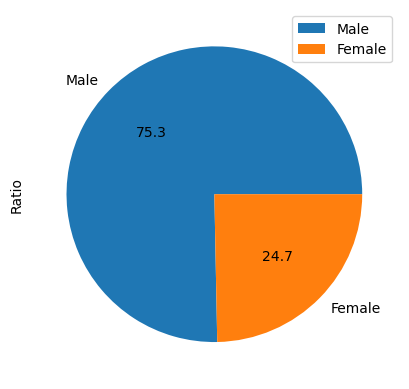

In [11]:
#plotting in graph 
data.plot.pie(y='Ratio',autopct="%.1f")

<Axes: >

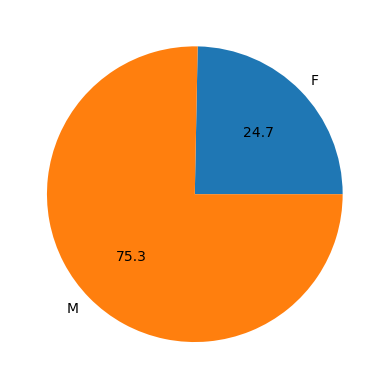

In [72]:
df.groupby("Gender").size().plot(kind="pie",autopct="%.1f")

#### understanding purachse and sale ratio based on gender 


<Axes: ylabel='Purchase'>

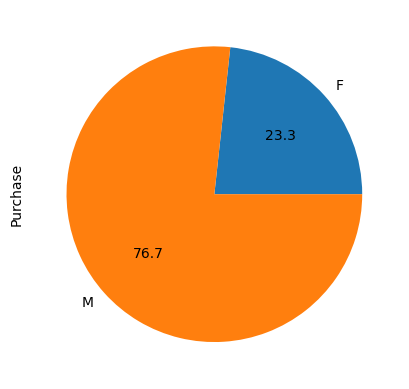

In [13]:
df.groupby("Gender").sum()["Purchase"].plot(kind="pie",autopct="%.1f")